<a href="https://colab.research.google.com/github/arusskina/neuro-algoritms/blob/main/test_cancer1_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/arusskina/neuro-algoritms.git

Cloning into 'neuro-algoritms'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (153/153), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 153 (delta 88), reused 113 (delta 53), pack-reused 0
Receiving objects: 100% (153/153), 158.61 KiB | 6.10 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [2]:
%cd neuro-algoritms

/content/neuro-algoritms


In [3]:
from esp import ESPAlgorithm
from esp import Cancer1Dataset
import random
import matplotlib.pyplot as plt
import time

In [4]:
random.seed(1)

Объявляем параметры алгоритма: размер скрытого слоя; размер популяции; количество последних поколений, задающих взрывную мутацию; минимальное количество попыток для нейрона.

In [5]:
algorithm_params = (10, 15, 2, 2)


Заргужаем тестовые данные

In [6]:
cancer1_dataset = Cancer1Dataset()
x_train, y_train = cancer1_dataset.get_train_data()

Создаём алгоритм

In [7]:
algorithm = ESPAlgorithm(
    hidden_layer_size=algorithm_params[0],
    population_size=algorithm_params[1],
    input_count=x_train.shape[1],
    output_count=y_train.shape[1],
    last_generations_count=algorithm_params[2],
    trials_per_neuron=algorithm_params[3])

Инициализируем алгоритм

In [8]:
algorithm.init(
    min_value=-1.0,
    max_value=1.0)

Запускаем алгоритм

In [9]:
start_time = time.time()
result = algorithm.train(
    generations_count=500,
    x_train=x_train,
    y_train=y_train)

Поколение     0, Количество попыток 138, Приспособленность лучшего нейрона 0.248793, Время выполнения 1.129 s
Поколение     1, Количество попыток  95, Приспособленность лучшего нейрона 0.248793, Время выполнения 0.721 s
Поколение     2, Количество попыток 141, Приспособленность лучшего нейрона 0.245128, Время выполнения 1.060 s
Взрывная мутация для подпопуляции   0. Текущее поколение   0
Взрывная мутация для подпопуляции   3. Текущее поколение   0
Взрывная мутация для подпопуляции   4. Текущее поколение   0
Взрывная мутация для подпопуляции   5. Текущее поколение   0
Взрывная мутация для подпопуляции   6. Текущее поколение   0
Взрывная мутация для подпопуляции   9. Текущее поколение   0
Поколение     3, Количество попыток 128, Приспособленность лучшего нейрона 0.245128, Время выполнения 0.936 s
Взрывная мутация для подпопуляции   1. Текущее поколение   0
Взрывная мутация для подпопуляции   2. Текущее поколение   0
Взрывная мутация для подпопуляции   7. Текущее поколение   0
Взрывная му

/content/neuro-algoritms/esp/activations.py:17: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-input_data))


Взрывная мутация для подпопуляции   3. Текущее поколение   7
Поколение    33, Количество попыток 112, Приспособленность лучшего нейрона 0.091491, Время выполнения 0.868 s
Поколение    34, Количество попыток 126, Приспособленность лучшего нейрона 0.091491, Время выполнения 0.948 s
Взрывная мутация для подпопуляции   0. Текущее поколение   8
Взрывная мутация для подпопуляции   2. Текущее поколение   8
Взрывная мутация для подпопуляции   7. Текущее поколение   8
Поколение    35, Количество попыток 116, Приспособленность лучшего нейрона 0.091491, Время выполнения 0.831 s
Взрывная мутация для подпопуляции   4. Текущее поколение   8
Взрывная мутация для подпопуляции   9. Текущее поколение   9
Поколение    36, Количество попыток 139, Приспособленность лучшего нейрона 0.091491, Время выполнения 1.040 s
Взрывная мутация для подпопуляции   5. Текущее поколение   8
Взрывная мутация для подпопуляции   6. Текущее поколение   8
Взрывная мутация для подпопуляции   8. Текущее поколение   8
Поколение  

In [10]:
print("Время выполнения %s секунд" % (time.time() - start_time))

Время выполнения 496.5075190067291 секунд


Выводим изменение среднеквадратичной ошибки (приспособленности) лучшей нейронной сети в процессе эволюции

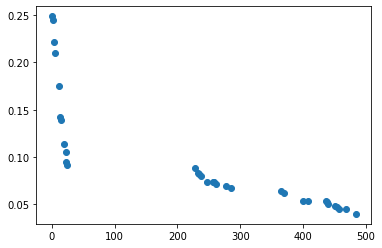

In [11]:
x = [item[0] for item in result]
y = [item[1] for item in result]
plt.scatter(x, y)
plt.show()